In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names'

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
attr_pos=soup.get_text().find('@relation crimepredict')
end_pos=soup.get_text().find('@data')
text=soup.get_text()[attr_pos:end_pos]

In [6]:
text_list=text.split('\n')

In [7]:
headers_list=[]
for attr in text_list:
    if 'attribute' in attr:
        headers_list.append(attr.split()[1])
print(headers_list)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [8]:
fhand=open('communities.csv','r')
output_file=open('comm.csv','w')
for header in headers_list:
    output_file.write(header)
    output_file.write(',')
output_file.write('\n')
file_contents=fhand.readlines()
for value in file_contents:
       output_file.write(value)

#output_file.write('\n')
output_file.close()


In [9]:
import pandas as pd

In [10]:
data_file=pd.read_csv('comm.csv',index_col=None)

In [11]:
data_file.rename(columns={"Unnamed: 128":"x"},inplace=True)
data=data_file.drop(['x'],axis='columns')
data=data.drop(['state','county','community','communityname','fold'],axis='columns')

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer


In [14]:
data=data.replace('?',np.nan)
#trainingset=trainingset.replace('?',np.nan)
#testset=testset.replace('?',np.nan)

In [15]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [16]:
#values=data.values
#values_tr=trainingset.values
#imputer = Imputer()
#transformed_values_tr = imp_mean.fit_transform(trainingset)
#values_test=testset.values
#transformed_values_test=imp_mean.fit_transform(testset)
transformed_values=imp_mean.fit_transform(data)

In [17]:
dataset=pd.DataFrame(transformed_values,columns=headers_list[5:])
#trainingdata=pd.DataFrame(transformed_values_tr,columns=headers_list[5:])
#testdata=pd.DataFrame(transformed_values_test,columns=headers_list[5:])

In [18]:
trainingdata=dataset.iloc[:1495]
testdata=dataset.iloc[1495:]

In [19]:
testdata

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1500,0.01,0.48,0.02,0.77,0.84,0.05,0.37,0.26,0.20,0.50,...,0.01,0.23,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.04
1501,0.05,0.64,0.03,0.84,0.21,0.33,0.45,0.50,0.30,0.24,...,0.02,0.39,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.25
1502,0.27,0.37,0.22,0.67,0.42,0.07,0.39,0.50,0.33,0.42,...,0.14,0.31,0.22,0.250000,0.090000,0.840000,1.000000,0.45,0.210000,0.76
1503,0.00,0.24,0.01,0.95,0.01,0.01,0.22,0.23,0.13,1.00,...,0.06,0.04,0.03,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15
1504,0.02,0.32,0.20,0.81,0.08,0.05,0.28,0.43,0.26,0.59,...,0.02,0.26,0.09,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

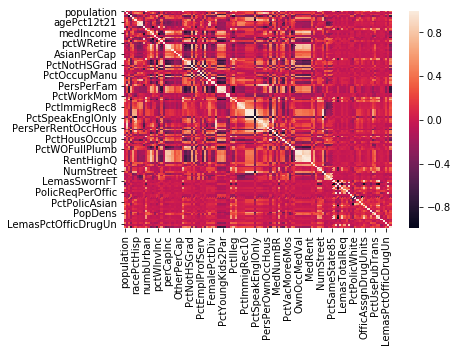

In [21]:
sns.heatmap(dataset.corr())

In [22]:
from scipy.stats import variation

In [23]:
var=variation(dataset,axis=0)
print(var)

[2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67047639 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279 0.41628674 0.47681363 3.48460717

In [24]:
feat_cv=dict()
feat_cv=list(zip(dataset.columns,var))

In [25]:
from operator import itemgetter

In [26]:
feat_highest_cv=sorted(feat_cv,key=itemgetter(1),reverse=True)[:11]
dictionary=dict()
for k,v in feat_highest_cv:
    dictionary[k]=v

feat_highest_cv_df=pd.DataFrame(dictionary,index=[0])
feat_highest_cv_df

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,4.406597,3.484607,2.993446,2.89977,2.554625,2.304392,2.20295,2.001242,1.958288,1.677611,1.613873


In [27]:
temp_df=pd.DataFrame()
for column in dataset.columns:
    for k in dictionary.keys():
        if column==k:
            temp_df1=dataset.filter([column],axis=1)
            temp_df=pd.concat([temp_df1,temp_df],axis=1)
    
            

In [28]:
temp_df

,LemasPctOfficDrugUn,LandArea,NumStreet,NumInShelters,HousVacant,NumImmig,NumIlleg,NumUnderPov,numbUrban,racePctHisp,population
0,0.32,0.12,0.00,0.04,0.21,0.03,0.04,0.08,0.20,0.17,0.19
1,0.00,0.02,0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.07,0.00
2,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.04,0.00
3,0.00,0.02,0.00,0.00,0.01,0.02,0.03,0.01,0.06,0.10,0.04
4,0.00,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.05,0.01
5,0.00,0.01,0.00,0.00,0.02,0.04,0.00,0.01,0.04,0.25,0.02
6,0.00,0.05,0.00,0.00,0.01,0.01,0.00,0.01,0.02,0.02,0.01
7,0.00,0.01,0.00,0.00,0.01,0.02,0.02,0.03,0.00,1.00,0.01
8,0.00,0.04,0.00,0.01,0.04,0.00,0.02,0.04,0.04,0.00,0.03
9,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.02,0.03,0.01


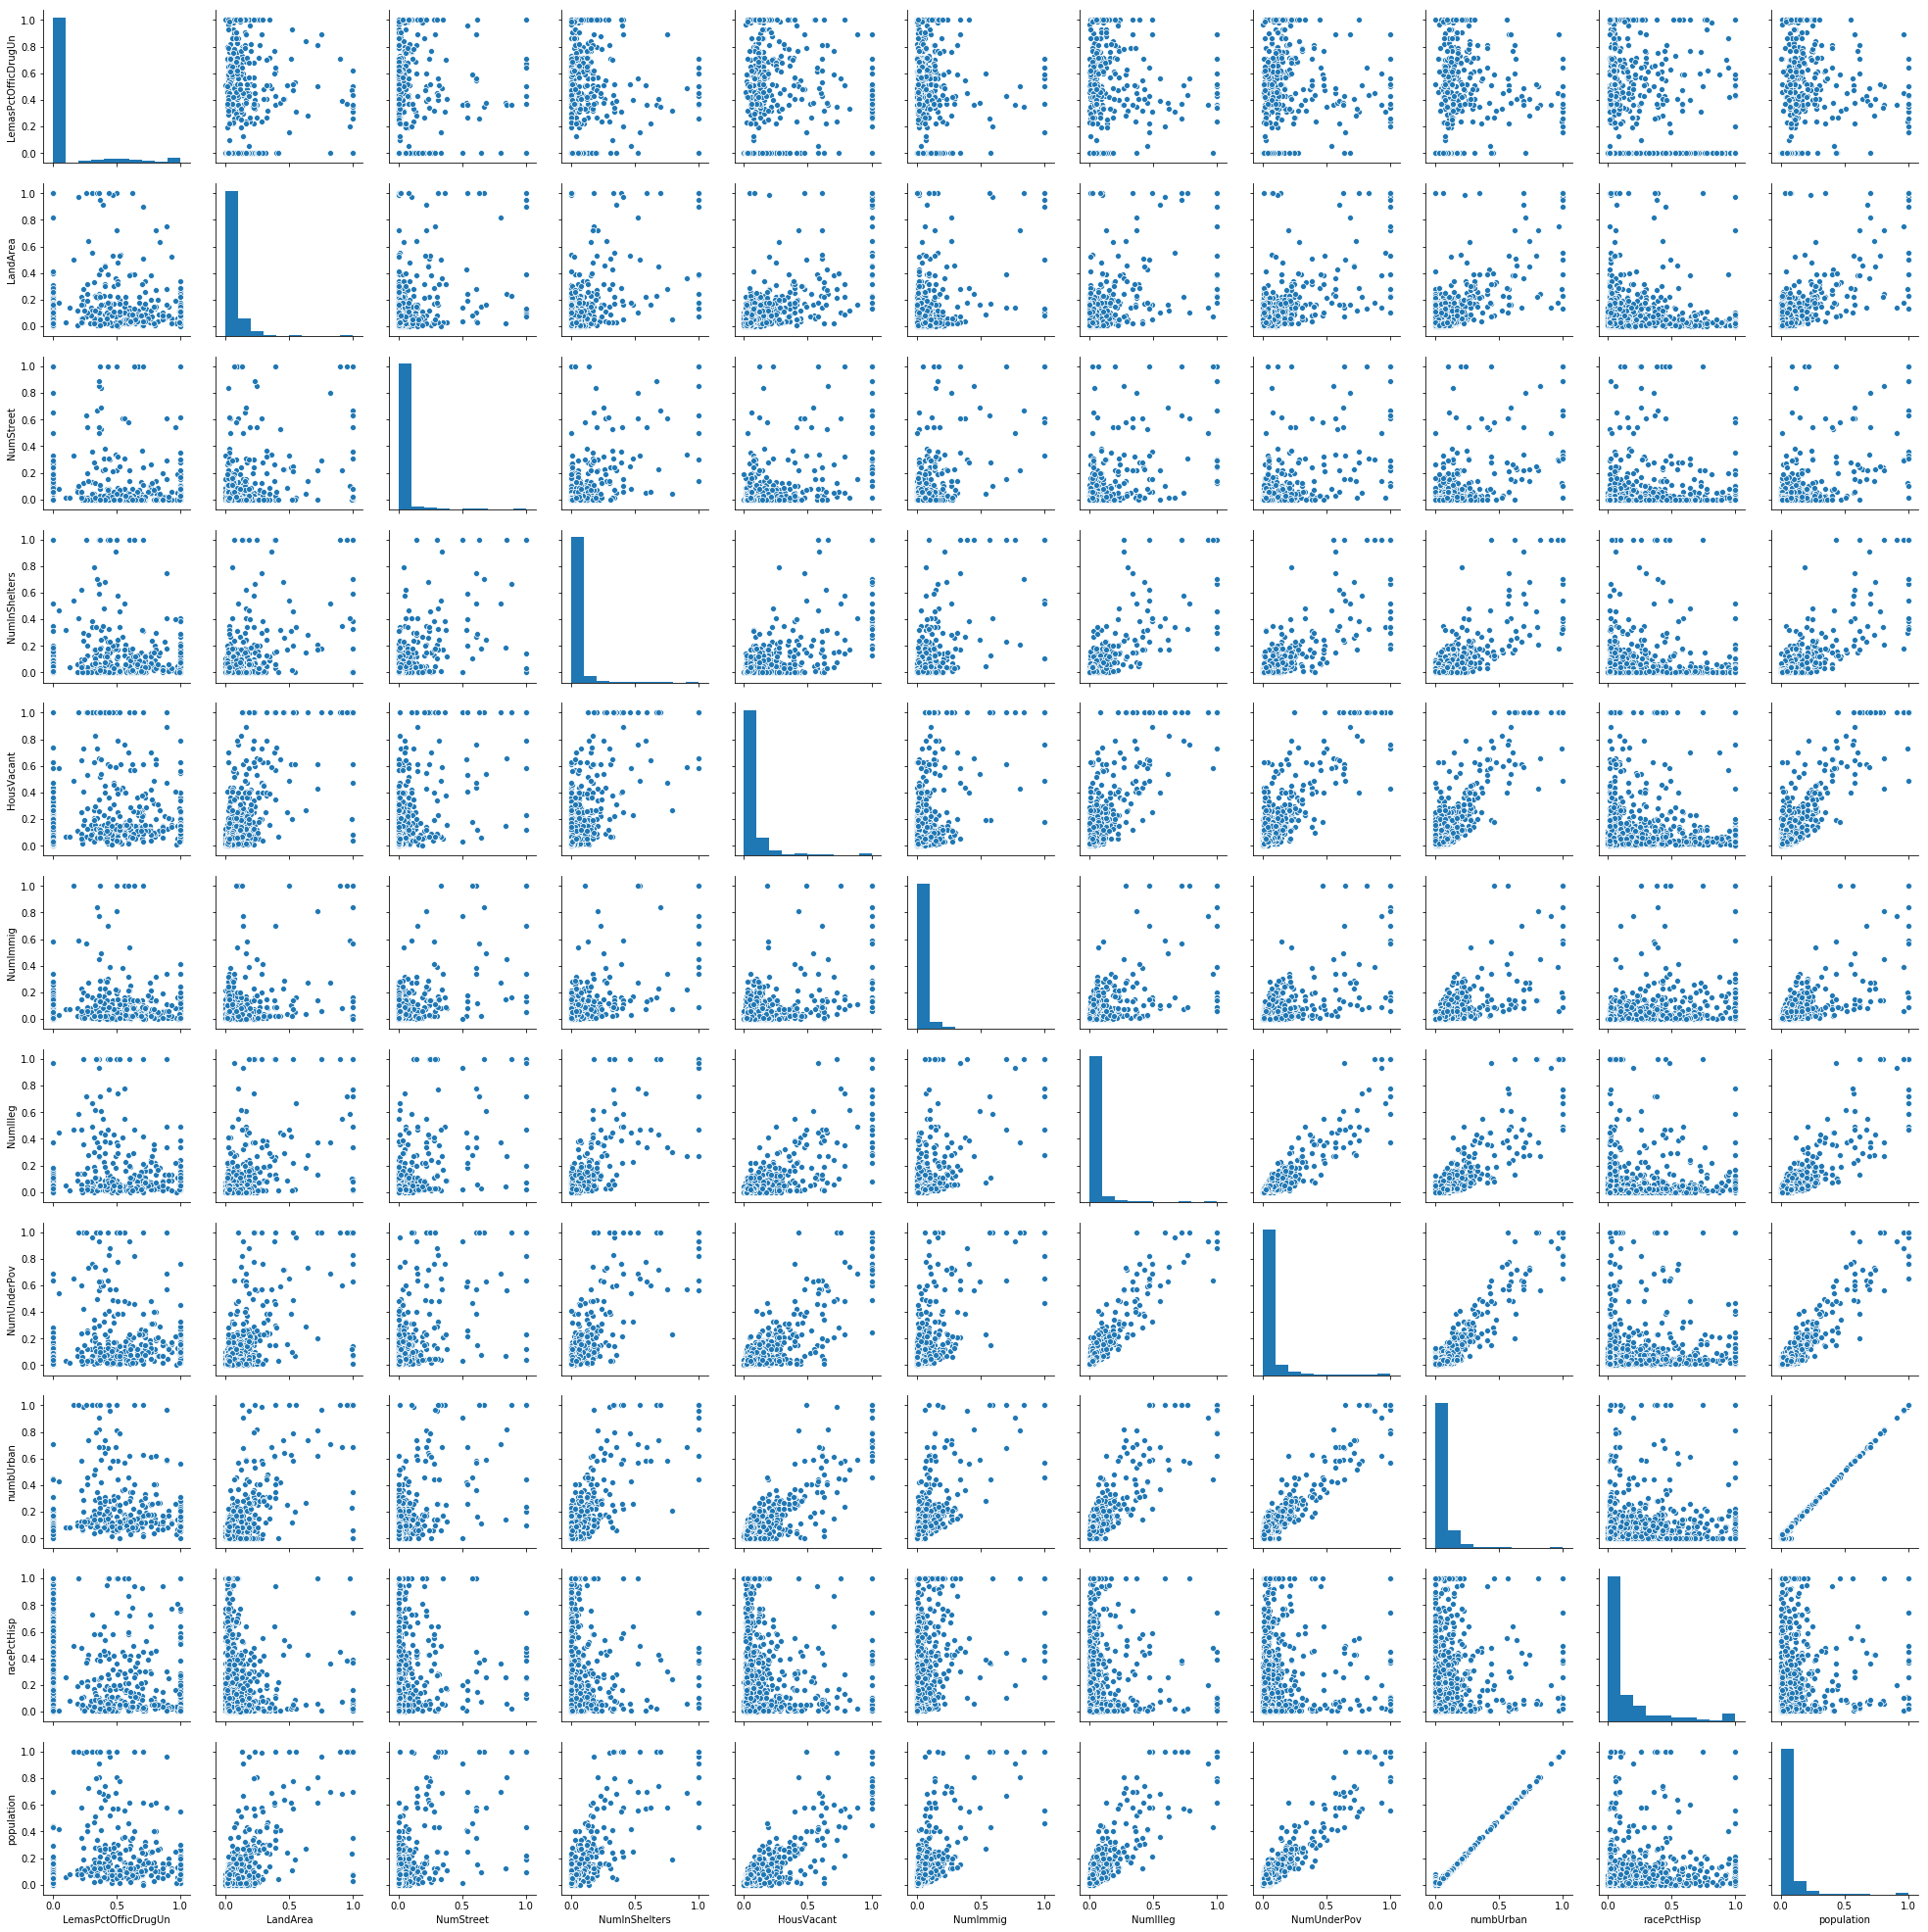

In [29]:
plot=sns.pairplot(temp_df)
plot.savefig('scatter1-hw4.png')

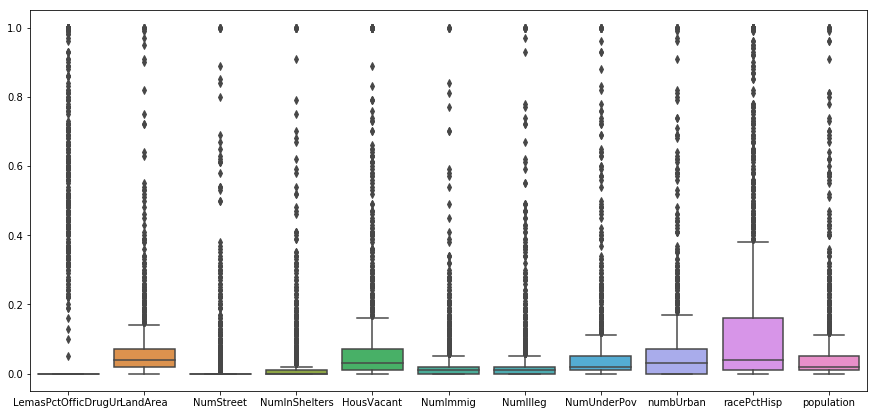

In [30]:
plt.figure(figsize=(15,7))
boxplot=sns.boxplot(data=temp_df)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
X_train=trainingdata.iloc[:,:-1]
y_train=trainingdata.iloc[:,-1]
reg = LinearRegression()
reg=reg.fit(X_train,y_train)
X_test=testdata.iloc[:,:-1]
y_test=testdata.iloc[:,-1]

In [33]:
y_pred=reg.predict(X_test)
testerror=mean_squared_error(y_test,y_pred)

In [34]:
testerror #1(f)

0.789725527436425

In [35]:
from sklearn.linear_model import RidgeCV

In [36]:
clf = RidgeCV().fit(X_train, y_train)

In [37]:
y_ridge_pred=clf.predict(X_test)

In [38]:
testerror_ridge=mean_squared_error(y_test,y_ridge_pred)
print(testerror_ridge) #1(g)

0.01773708110430887


In [39]:
from sklearn.linear_model import LassoCV

In [40]:
lassocvmodel = LassoCV(cv=3,fit_intercept=True,max_iter=5000,tol=0.01)
lassocvmodel.fit(X_train,y_train)
y_pred_lasso=lassocvmodel.predict(X_test)
testerror_lasso=mean_squared_error(y_test,y_pred_lasso) #before standardization
print(testerror_lasso)

0.017581113169130073


In [41]:
#index=[]
#for ind in range(len(lassocvmodel.coef_)): 
 #   if lassocvmodel.coef_[ind]!=0:  #extracting indices of only features which are important
  #      index.append(ind)

In [144]:
#X_lasso_train=X_train.iloc[:,index]
#X_lasso_test=X_test.iloc[:,index]
#lassocvmodel.fit(X_lasso_train,y_train)
#y_new=lassocvmodel.predict(X_lasso_test)
#testerror_lasso_new=mean_squared_error(y_test,y_new)
#print(testerror_lasso_new)

In [43]:
col_name=X_train.columns[index]
print(col_name)
    
    

Index(['racepctblack', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom',
       'PctIlleg', 'PctImmigRec5', 'PctRecImmig10', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'PopDens', 'PctUsePubTrans',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn'],
      dtype='object')


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

In [46]:
lassocvmodel_std = LassoCV(cv=3,fit_intercept=True,max_iter=5000,tol=0.01)
lassocvmodel_std.fit(X_train_scaled,y_train)
y_pred_lasso_std=lassocvmodel_std.predict(X_test_scaled)
testerror_lasso_std=mean_squared_error(y_test,y_pred_lasso_std) #after standardization
print(testerror_lasso_std)

0.01782542551120633


In [47]:
#index_2=[]
#for ind in range(len(lassocvmodel_std.coef_)): 
 #   if lassocvmodel_std.coef_[ind]!=0:  #extracting indices of only features which are important
  #      index_2.append(ind)

In [48]:
#X_lasso_std_train=X_train_scaled.iloc[:,index_2]
#X_lasso_std_test=X_test_scaled.iloc[:,index_2]
#lassocvmodel_std.fit(X_lasso_std_train,y_train)
#y_pred_lasso_std_new=lassocvmodel_std.predict(X_lasso_std_test)
#testerror_lasso_std_new=mean_squared_error(y_test,y_pred_lasso_std_new)
#print(testerror_lasso_std_new)

In [145]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


In [149]:
pca = PCA()
reg=LinearRegression()
Xtrain_reduced = pca.fit_transform(scale(X_train))
n=len(Xtrain_reduced)
kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
error=[]
score=-1*model_selection.cross_val_score(reg, np.ones((n,1)), y_train.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean()    
error.append([0,score])
for comp in np.arange(1,pca.n_components_+1):
    score=-1*model_selection.cross_val_score(reg, Xtrain_reduced[:,:comp], y_train.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean()
    error.append([comp,score])
error.sort(key=lambda x:x[1])
#print(error.sort(key=lambda x:x[1]))
bestm=error[0][0]
Xtest_reduced=pca.transform(scale(X_test))[:,:bestm+1]

lreg=LinearRegression().fit(Xtrain_reduced[:,:bestm+1],y_train)
y_pred_pca=lreg.predict(Xtest_reduced)
print("test error: ",mean_squared_error(y_test,y_pred_pca))
    

test error:  0.018819644010020897


In [150]:
import xgboost as xgb

In [151]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [153]:
params={'colsample_bytree':0.3,'learning_rate':0.1,'objective':'reg:linear','max_depth':5,'alpha':10}
cv_output=xgb.cv(dtrain=data_dmatrix,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',as_pandas=True,seed=123)
print("RMSE error: ",cv_output['test-rmse-mean'].tail(1))

RMSE error:  49    0.147878
Name: test-rmse-mean, dtype: float64


In [51]:
#2(b)
trainset=pd.read_csv('aps_failure_training_set.csv',index_col=None,skiprows=20)
testset=pd.read_csv('aps_failure_test_set.csv',index_col=None,skiprows=20)
temp_class_tr=trainset.iloc[:,0]


In [52]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [53]:
trainset=trainset.replace('na',np.nan)


In [54]:
transformed_values_tr=imp_mean.fit_transform(trainset.iloc[:,1:])
tr_header=list(trainset)


In [55]:
trainset=pd.DataFrame(transformed_values_tr,columns=tr_header[1:])
trainset=pd.concat([trainset,temp_class_tr],axis=1)


In [56]:
temp_class_test=testset.iloc[:,0]
testset=testset.replace('na',np.nan)
transformed_values_test=imp_mean.fit_transform(testset.iloc[:,1:])
test_header=list(testset)

In [57]:
testset=pd.DataFrame(transformed_values_test,columns=test_header[1:])
testset=pd.concat([testset,temp_class_test],axis=1)


In [58]:
trainset_copy=trainset.copy()
testset_copy=testset.copy()

In [155]:
#2(b)(ii)
var_train=variation(trainset.iloc[:,:-1],axis=0)
print(var_train)


[  2.45091715   2.32838058   2.16974844 183.8460883   23.19074341
  18.6587656   91.87779897  34.85465962  17.36899866   8.54997778
   5.40143368   2.92706769   2.34490753   2.83346048   6.15453179
  32.98407617   2.30016808  18.01253164  43.80145737  74.5260669
   9.0742952    9.05859612   2.23877812   2.26013028   3.05913881
   2.83958803  10.83695939  86.4161837   23.45922929  68.15998601
   5.77873675   3.87753603  37.00925391  52.23341648  38.80925699
  28.41330475  33.37443788  12.38403755   3.02306245   3.28421469
   3.77561604  83.78536479   9.32826675   7.6463558   13.14158342
   7.44591379   2.81711666   3.00804943   8.78083868  16.04744938
  22.42558271  76.96733666   2.68305412   2.60870996   2.87873171
   2.7160934    2.61599931   2.67985343   3.00724764   2.81034518
   6.75148907   9.32142229   2.39229943   6.94077979   5.1226311
   6.59664885   7.14856756   2.29781659   2.61276291   3.00252249
   3.55062182   0.73137228   0.73356539   0.59472087   0.51705631
   0.4625598

In [154]:
var_test=variation(testset.iloc[:,:-1],axis=0)
print(var_test)

[  7.40502284   1.59870303   2.1597436    3.05915923  17.9838153
  16.0464513   53.08869824  42.98327275  16.99752789   9.05402911
   5.66288381   3.08054074   2.37913682   2.73434648   6.69882817
  29.45403239   2.36272981  19.16541062  40.89005294  93.71043811
   9.10995685   8.9871512    2.30211109   2.32546601   3.16565349
   2.89236313   9.39761382  82.36046603  22.2444046   84.53109006
   5.55559025   3.79139835  39.82036451  41.34849063  36.70293614
  28.01012644  30.40932352   8.79285989   3.01735978   3.12467346
   4.38490886  45.08805311   7.82943241   6.39156486   6.29684258
   7.97488344   2.90707713   3.25001983   8.42624043  13.16400594
  21.80430506  59.66826905   2.7042687    2.77180683   2.9105815
   2.77155293   2.71933182   2.77850393   2.95889008   2.86269021
   6.53816942   9.97129603   2.46406669   5.6528581    4.94992361
   5.4236913    6.71981731   2.36137941   2.65988797   3.03581173
   3.65729725   0.72558963   0.72778219   0.59260053   0.51962727
   0.4641013

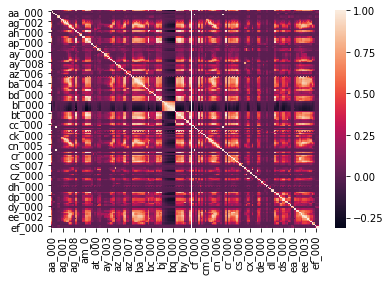

In [60]:
#2(b)(iii)
corr_tr=sns.heatmap(trainset.corr()) #plotting correlation matrix for trainset


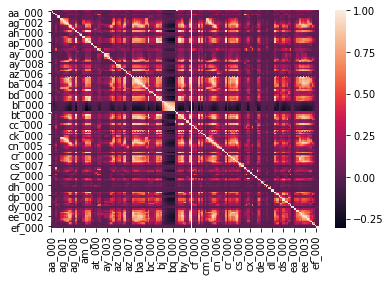

In [61]:
corr_test=sns.heatmap(testset.corr())   #plotting correlation matrix for testset

In [62]:
#2(b)(iv)
feat_cv_tr=list(zip(trainset.columns,var_train))
feat_cv_test=list(zip(testset.columns,var_test))

In [63]:
feat_highest_cv_tr=sorted(feat_cv_tr,key=itemgetter(1),reverse=True)[:13]
feat_highest_cv_test=sorted(feat_cv_test,key=itemgetter(1),reverse=True)[:13]

dictionary_tr=dict()
dictionary_test=dict()

for k,v in feat_highest_cv_tr:
    dictionary_tr[k]=v
for k,v in feat_highest_cv_test:
    dictionary_test[k]=v

feat_highest_cv_tr_df=pd.DataFrame(dictionary_tr,index=[0])
feat_highest_cv_test_df=pd.DataFrame(dictionary_test,index=[0])


In [64]:
temp_df_tr=pd.DataFrame()
for column in trainset.columns:
    for k in dictionary_tr.keys():
        if column==k:
            temp_df1_tr=trainset.filter([column],axis=1)
            temp_df_tr=pd.concat([temp_df1_tr,temp_df_tr],axis=1)


    

In [65]:
temp_df_tr

,dj_000,dh_000,cs_009,co_000,ch_000,cf_000,az_009,ay_009,au_000,as_000,ak_000,ag_000,ad_000
0,0.000000,0.000000,0.0,220.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,280.000000
1,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,100.000000
3,0.000000,0.000000,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,66.000000
4,0.000000,0.000000,0.0,202.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,458.000000
5,0.000000,0.000000,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,218.000000
6,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
7,0.000000,0.000000,0.0,6.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,116.000000
8,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,2.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
9,0.000000,55760.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314


In [66]:
temp_df_test=pd.DataFrame()
for column in testset.columns:
    for k in dictionary_test.keys():
        if column==k:
            temp_df1_test=testset.filter([column],axis=1)
            temp_df_test=pd.concat([temp_df1_test,temp_df_test],axis=1)

In [ ]:
plot_train=sns.pairplot(temp_df_tr)
plot_train.savefig('scatter2-hw4.png')

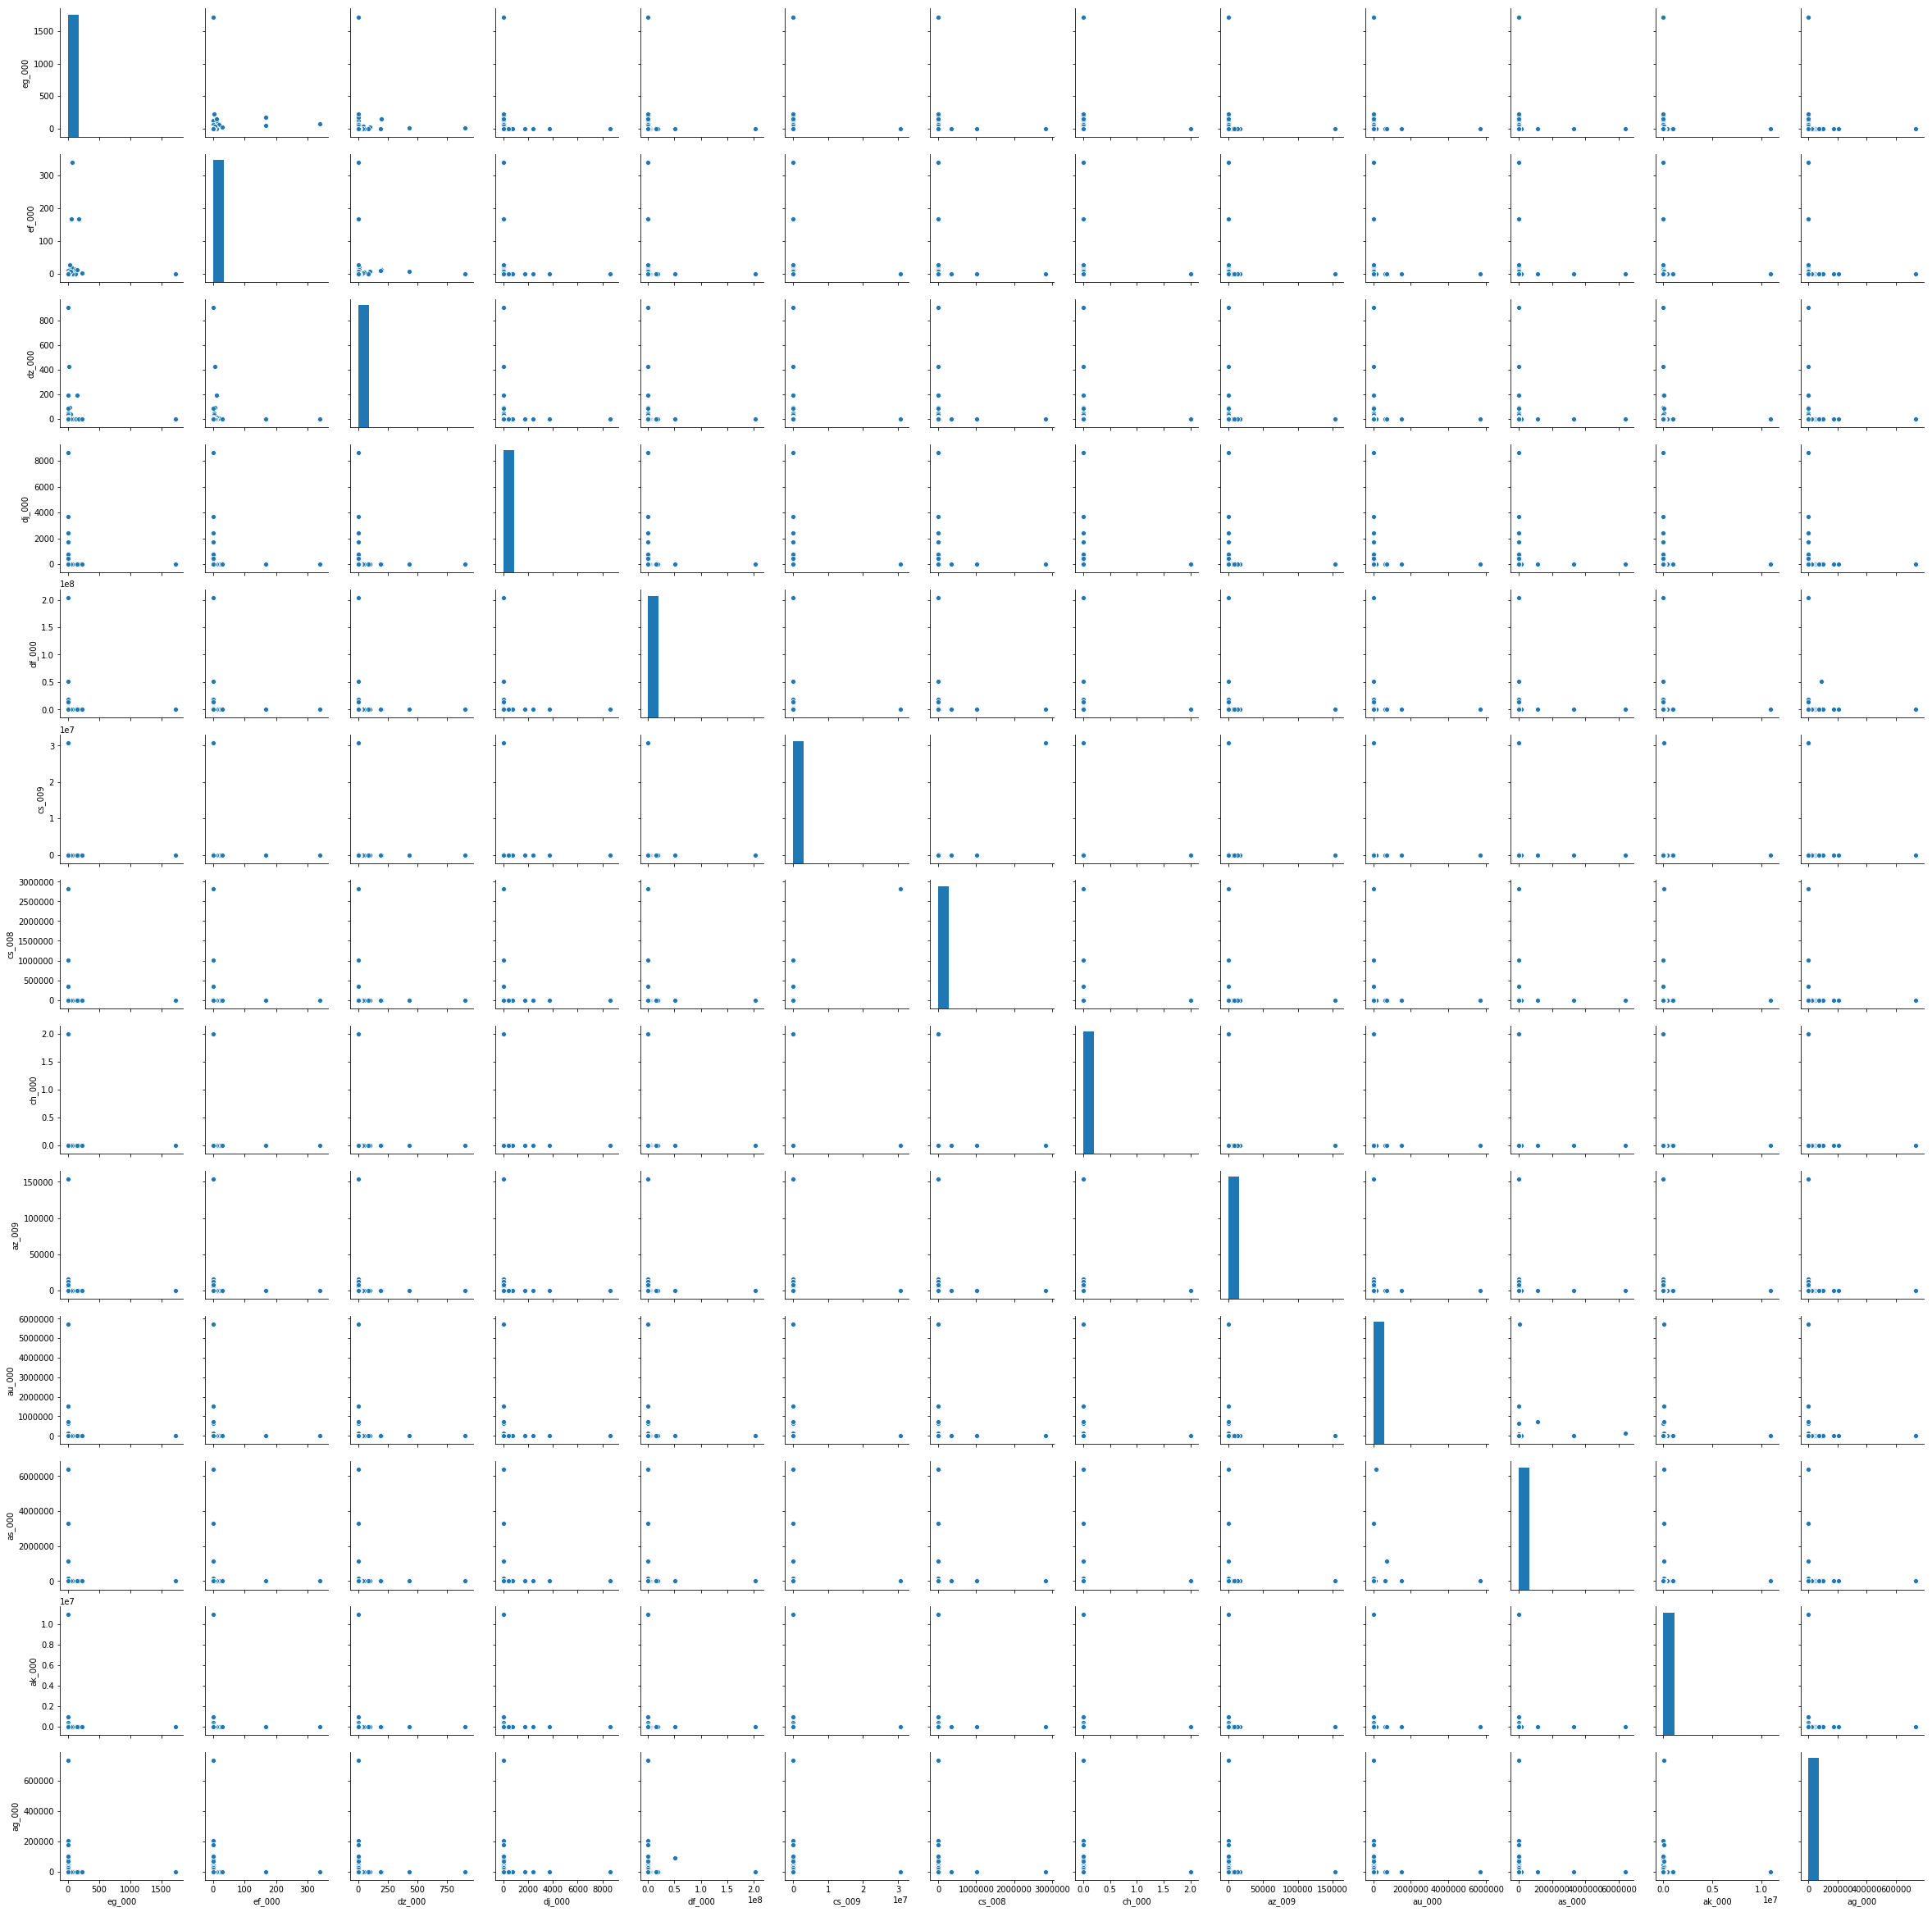

In [596]:
plot_test=sns.pairplot(temp_df_test)
plot_test.savefig('scatter3-hw4.png')

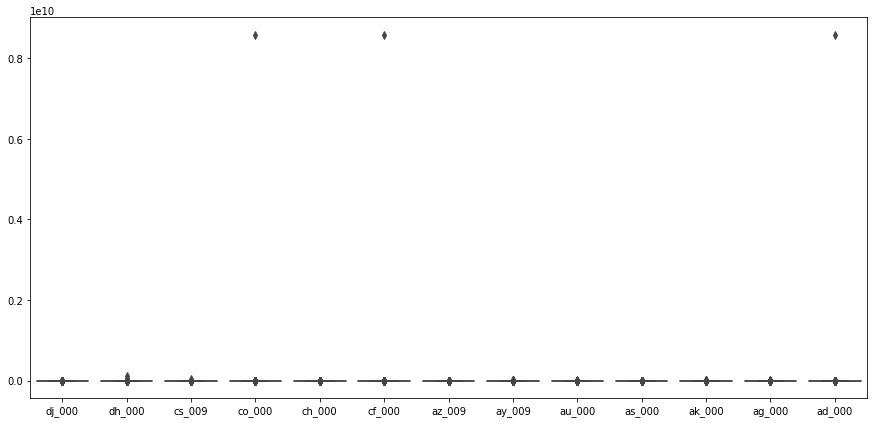

In [600]:
plt.figure(figsize=(15,7))
boxplot_train=sns.boxplot(data=temp_df_tr)

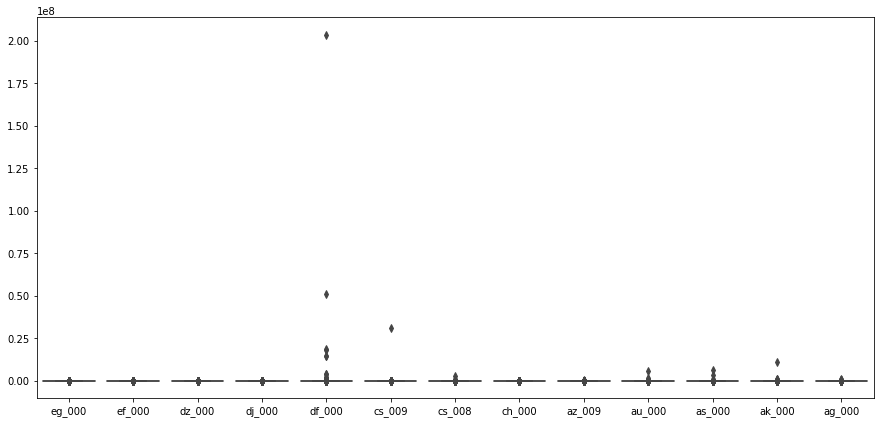

In [601]:
plt.figure(figsize=(15,7))
boxplot_test=sns.boxplot(data=temp_df_test)

In [67]:
trainset.groupby('class').count()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,,,,,,,,,,,,,,,,,,,,,
neg,59000,59000,59000,59000,59000,59000,59000,59000,59000,59000,...,59000,59000,59000,59000,59000,59000,59000,59000,59000,59000
pos,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [68]:
#2(c)
from sklearn.ensemble import RandomForestClassifier

In [69]:
trainset['Class'] = trainset['class'].map({'neg': 0, 'pos': 1})
testset['Class']=testset['class'].map({'neg': 0, 'pos': 1})




In [70]:
trainset.drop(['class'],axis='columns',inplace=True)
testset.drop(['class'],axis='columns',inplace=True)

In [71]:
X_tree_train=trainset.iloc[:,:-1]
y_tree_train=trainset.iloc[:,-1]
X_tree_test=testset.iloc[:,:-1]
y_tree_test=testset.iloc[:,-1]
X_tree_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.682000e+03,...,1.098000e+03,1.380000e+02,4.120000e+02,6.540000e+02,7.800000e+01,8.800000e+01,0.000000e+00,0.000000,0.000000,0.000000
1,82.0,0.000000,6.800000e+01,40.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.068000e+03,2.760000e+02,1.620000e+03,1.160000e+02,8.600000e+01,4.620000e+02,0.000000e+00,0.000000,0.000000,0.000000
2,66002.0,2.000000,2.120000e+02,112.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.994860e+05,...,4.950760e+05,3.803680e+05,4.401340e+05,2.695560e+05,1.315022e+06,1.536800e+05,5.160000e+02,0.000000,0.000000,0.000000
3,59816.0,0.772065,1.010000e+03,936.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.408200e+05,2.432700e+05,4.833020e+05,4.853320e+05,4.313760e+05,2.100740e+05,2.816620e+05,3232.000000,0.000000,0.000000
4,1814.0,0.772065,1.560000e+02,140.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,7.646000e+03,4.144000e+03,1.846600e+04,4.978200e+04,3.176000e+03,4.820000e+02,7.600000e+01,0.000000,0.000000,0.000000
5,174.0,0.772065,2.600000e+01,24.000000,0.000000,0.00000,120.858516,2064.203656,13792.360509,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8560.354884,0.000000,0.000000
6,40202.0,0.772065,6.400000e+02,606.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.262180e+05,2.397340e+05,4.395560e+05,3.742480e+05,1.690960e+05,5.365800e+04,4.105400e+04,320.000000,0.000000,0.000000
7,120278.0,0.772065,2.130706e+09,256.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.006722e+06,4.596580e+05,8.763560e+05,6.895320e+05,5.685400e+05,5.006240e+05,1.006628e+06,34820.000000,0.000000,0.000000
8,14592.0,0.000000,2.130706e+09,162.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.050240e+05,5.739800e+04,4.915200e+04,3.825600e+04,2.432680e+05,1.451440e+05,0.000000e+00,0.000000,0.000000,0.000000
9,28338.0,0.772065,2.130706e+09,238.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,3.570060e+05,1.500560e+05,2.647760e+05,2.392820e+05,1.405480e+05,7.475000e+04,3.295800e+04,84.000000,0.000000,0.000000


In [72]:
clf_rf=RandomForestClassifier(n_estimators=100,oob_score=True)
clf_rf=clf_rf.fit(X_tree_train,y_tree_train)
y_pred_tr_rf=clf_rf.predict(X_tree_train)
y_pred_test_rf=clf_rf.predict(X_tree_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
print(confusion_matrix(y_tree_train,y_pred_tr_rf)) #confusion matrix for train set


[[59000     0]
 [    0  1000]]


In [75]:
print(confusion_matrix(y_tree_test,y_pred_test_rf)) #confusion matrix for test set


[[15606    19]
 [  102   273]]


In [76]:
trainerror_rf=mean_squared_error(y_pred_tr_rf,y_tree_train)
print(trainerror_rf)

0.0


In [77]:
testerror_rf=mean_squared_error(y_pred_test_rf,y_tree_test)
print(testerror_rf)

0.0075625


In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

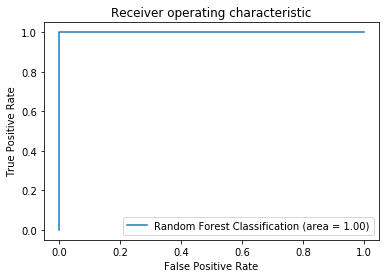

1.0


In [79]:
rf_roc_auc_train = roc_auc_score(y_tree_train,y_pred_tr_rf)
fpr_tr, tpr_tr, thresholds_tr= roc_curve(y_tree_train,y_pred_tr_rf)
plt.figure()
plt.plot(fpr_tr, tpr_tr, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_trainset')
plt.show()
print(rf_roc_auc_train)

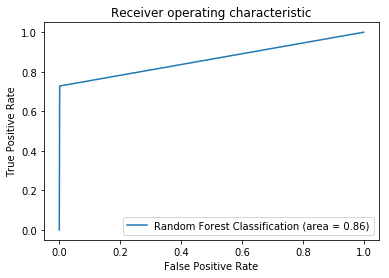

0.8633919999999999


In [80]:
rf_roc_auc_test = roc_auc_score(y_tree_test,y_pred_test_rf)
fpr_test, tpr_test, thresholds_test= roc_curve(y_tree_test,y_pred_test_rf)
plt.figure()
plt.plot(fpr_test, tpr_test, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_testset')
plt.show()
print(rf_roc_auc_test)

In [81]:
print('Out of Bag error: ',clf_rf.oob_score_)

Out of Bag error:  0.9940833333333333


In [82]:
#2(d)
clf_rf_imb=RandomForestClassifier(n_estimators=100,oob_score=True,class_weight="balanced")
clf_rf_imb=clf_rf_imb.fit(X_tree_train,y_tree_train)
y_pred_tr_rf_imb=clf_rf_imb.predict(X_tree_train)
y_pred_test_rf_imb=clf_rf_imb.predict(X_tree_test)

In [83]:
print(confusion_matrix(y_tree_train,y_pred_tr_rf_imb)) #confusion matrix for train set

[[59000     0]
 [    0  1000]]


In [84]:
print(confusion_matrix(y_tree_test,y_pred_test_rf_imb)) #confusion matrix for test set


[[15610    15]
 [  170   205]]


In [85]:
trainerror_rf_imb=mean_squared_error(y_pred_tr_rf_imb,y_tree_train)
print(trainerror_rf_imb)

0.0


In [86]:
testerror_rf_imb=mean_squared_error(y_pred_test_rf_imb,y_tree_test)
print(testerror_rf_imb)

0.0115625


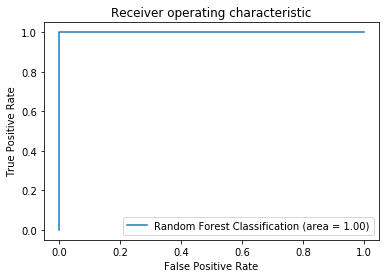

1.0


In [87]:
rf_roc_auc_train_imb = roc_auc_score(y_tree_train,y_pred_tr_rf_imb)
fpr_tr_imb, tpr_tr_imb, thresholds_tr_imb= roc_curve(y_tree_train,y_pred_tr_rf_imb)
plt.figure()
plt.plot(fpr_tr_imb, tpr_tr_imb, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_train_imb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_trainset_imb')
plt.show()
print(rf_roc_auc_train_imb)

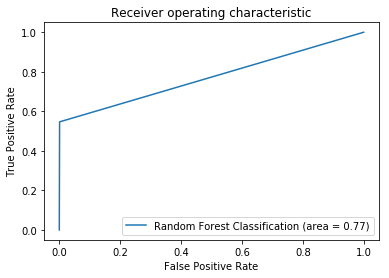

0.7728533333333334


In [88]:
rf_roc_auc_test_imb = roc_auc_score(y_tree_test,y_pred_test_rf_imb)
fpr_test_imb, tpr_test_imb, thresholds_test_imb= roc_curve(y_tree_test,y_pred_test_rf_imb)
plt.figure()
plt.plot(fpr_test_imb, tpr_test_imb, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_test_imb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_testset_imb')
plt.show()
print(rf_roc_auc_test_imb)

In [89]:
print('Out of Bag error: ',clf_rf_imb.oob_score_)

Out of Bag error:  0.99245


In [90]:
#2(e)
import arff
trainset

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,Class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0
5,38312.0,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0,0
6,14.0,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,102960.0,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0,0
8,78696.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0,0
9,153204.0,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,11804.0,...,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0,1


In [91]:
arff.dump('aps_failure_training_set.arff'
      , trainset.values
      , relation='training'
      , names=trainset.columns)
arff.dump('aps_failure_test_set.arff'
      , testset.values
      , relation='testing'
      , names=testset.columns)

In [92]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random

In [93]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['c:\\users\\shivani\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'c:\\users\\shivani\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'c:\\users\\shivani\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'c:\\users\\shivani\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'c:\\users\\shivani\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [94]:
clf_weka=Classifier(classname = "weka.classifiers.trees.LMT")
loader=Loader("weka.core.converters.ArffLoader")
train_data = loader.load_file("aps_failure_training_set.arff")
train_data.class_is_last()
clf_weka.build_classifier(train_data)

In [95]:
evaluation=Evaluation(train_data)
evaluation.crossvalidate_model(clf_weka,train_data,5,Random(42))
print("Train CV summary:")
print(evaluation.summary())
print(evaluation.matrix())
print(evaluation.area_under_roc(1))

Train CV summary:

Correctly Classified Instances       59496               99.16   %
Incorrectly Classified Instances       504                0.84   %
Kappa statistic                          0.7262
Mean absolute error                      0.0112
Root mean squared error                  0.0823
Relative absolute error                 34.163  %
Root relative squared error             64.3081 %
Total Number of Instances            60000     

=== Confusion Matrix ===

     a     b   <-- classified as
 58813   187 |     a = 0.0
   317   683 |     b = 1.0

0.9644223050847458


In [96]:
test_data=loader.load_file("aps_failure_training_set.arff")
test_data.class_is_last()


In [97]:
evaluation_test=Evaluation(test_data)
print("Test summary:")


Test summary:


In [98]:
evaluation_test.test_model(clf_weka,test_data)

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
print(evaluation_test.summary())
print(evaluation_test.matrix())
print(evaluation.area_under_roc(1))


Correctly Classified Instances       59699               99.4983 %
Incorrectly Classified Instances       301                0.5017 %
Kappa statistic                          0.8309
Mean absolute error                      0.0088
Root mean squared error                  0.0647
Relative absolute error                 26.8478 %
Root relative squared error             50.5333 %
Total Number of Instances            60000     

=== Confusion Matrix ===

     a     b   <-- classified as
 58946    54 |     a = 0.0
   247   753 |     b = 1.0

0.9644223050847458


In [104]:
#2(f)
from imblearn.over_sampling import SMOTE


In [105]:
X_train_imb=trainset.iloc[:,:-1]
X_test_imb=testset.iloc[:,:-1]
y_train_imb=trainset.iloc[:,-1]
y_test_imb=testset.iloc[:,-1]

In [106]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train_imb, y_train_imb)

In [108]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_imb==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_imb==0)))

Before OverSampling, counts of label '1': 1000
Before OverSampling, counts of label '0': 59000 



In [109]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 59000
After OverSampling, counts of label '0': 59000


In [134]:
oversampled_X_train=pd.DataFrame(X_train_res,columns=tr_header[1:])
oversampled_y_train=pd.DataFrame(y_train_res)

oversampled_y_train=oversampled_y_train.rename(columns={0:"class"})


In [135]:
oversampled_train_data=pd.concat([oversampled_X_train,oversampled_y_train],axis=1)

In [137]:
arff.dump('aps_failure_oversampled_training_set.arff'
      , oversampled_train_data.values
      , relation='training'
      , names=oversampled_train_data.columns)


In [139]:
clf_weka_balanced=Classifier(classname = "weka.classifiers.trees.LMT")
loader_balanced=Loader("weka.core.converters.ArffLoader")
train_data_balanced = loader_balanced.load_file("aps_failure_oversampled_training_set.arff")
train_data_balanced.class_is_last()
clf_weka_balanced.build_classifier(train_data_balanced)

In [140]:
evaluation_balanced=Evaluation(train_data_balanced)
evaluation_balanced.crossvalidate_model(clf_weka_balanced,train_data_balanced,5,Random(42))
print("Train CV summary:")
print(evaluation_balanced.summary())
print(evaluation_balanced.matrix())
print(evaluation_balanced.area_under_roc(1))

Train CV summary:

Correctly Classified Instances      115967               98.2771 %
Incorrectly Classified Instances      2033                1.7229 %
Kappa statistic                          0.9655
Mean absolute error                      0.0296
Root mean squared error                  0.1199
Relative absolute error                  5.9159 %
Root relative squared error             23.9852 %
Total Number of Instances           118000     

=== Confusion Matrix ===

     a     b   <-- classified as
 57708  1292 |     a = 0.0
   741 58259 |     b = 1.0

0.9956350527147372


In [141]:
evaluation_test_balanced=Evaluation(test_data)
print("Test summary:")

Test summary:


In [142]:
evaluation_test_balanced.test_model(clf_weka_balanced,test_data)

array([0., 0., 0., ..., 0., 0., 0.])

In [143]:
print(evaluation_test_balanced.summary())
print(evaluation_test_balanced.matrix())
print(evaluation_test_balanced.area_under_roc(1))


Correctly Classified Instances       59498               99.1633 %
Incorrectly Classified Instances       502                0.8367 %
Kappa statistic                          0.7889
Mean absolute error                      0.0204
Root mean squared error                  0.0842
Relative absolute error                 62.1849 %
Root relative squared error             65.7804 %
Total Number of Instances            60000     

=== Confusion Matrix ===

     a     b   <-- classified as
 58536   464 |     a = 0.0
    38   962 |     b = 1.0

0.997419


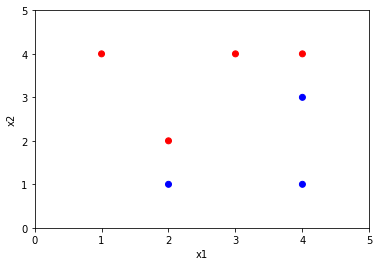

In [165]:
#6a
datafr=pd.DataFrame()
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["r", "r", "r", "r", "b", "b", "b"]
datafr['x1']=x1
datafr['x2']=x2
datafr['color']= colors
color_dict={'r':'red','b':'blue'}
fig, ax=plt.subplots()
ax.scatter(datafr['x1'],datafr['x2'],c=datafr['color'].apply(lambda x: color_dict[x]))
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

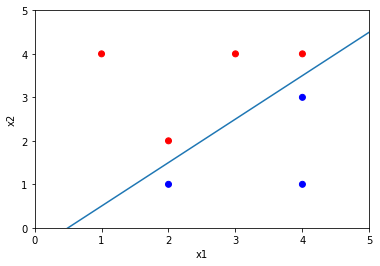

In [164]:
#6.b
fig,ax=plt.subplots()
colors={'r':'red','b':'blue'}
x=[0,1,2,3,4,5]
y=[-0.5,0.5,1.5,2.5,3.5,4.5]
ax.scatter(datafr['x1'],datafr['x2'],c=datafr['color'].apply(lambda x:colors[x]))
ax.plot(x,y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

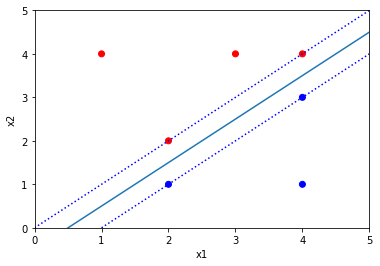

In [166]:
#6 d
fig,ax=plt.subplots()
colors={'r':'red','b':'blue'}
x=[0,1,2,3,4,5]
y=[-0.5,0.5,1.5,2.5,3.5,4.5]
x1=[0,1,2,3,4,5]
x2=[1,2,3,4,5]
y1=[0,1,2,3,4,5]
y2=[0,1,2,3,4]
ax.scatter(datafr['x1'],datafr['x2'],c=datafr['color'].apply(lambda x:colors[x]))
ax.plot(x,y)
ax.plot(x1,y1,'b:')
ax.plot(x2,y2,'b:')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()


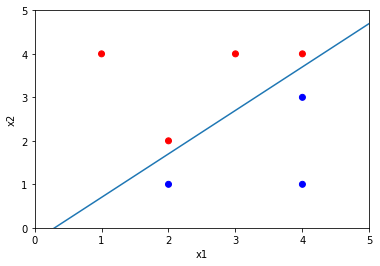

In [167]:
#6g
fig,ax=plt.subplots()
colors={'r':'red','b':'blue'}
x=[0,1,2,3,4,5]
y=[-0.3,0.7,1.7,2.7,3.7,4.7]
ax.scatter(datafr['x1'],datafr['x2'],c=datafr['color'].apply(lambda x:colors[x]))
ax.plot(x,y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

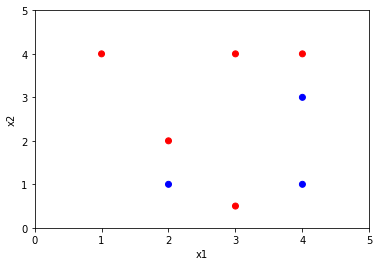

In [169]:
#6h
fig,ax=plt.subplots()
colors=["r","r","r","r","b","b","r","b"]
x1=[3,2,4,1,2,4,3,4]
x2=[4,2,4,4,1,3,0.5,1]
df=pd.DataFrame()
df['x1']=x1
df['x2']=x2
df['color']=colors
colors={'r':"red",'b':"blue"}
ax.scatter(df['x1'],df['x2'],c=df['color'].apply(lambda x:colors[x]))

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()